## 공통

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split

np.random.seed(0)

## 데이터 정리

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# finger_data 폴더에서 다운로드

tv_x = np.load('/content/drive/My Drive/train_x.npy')
tv_y = np.load('/content/drive/My Drive/train_y.npy')
test_x = np.load('/content/drive/My Drive/test_x.npy')
test_y = np.load('/content/drive/My Drive/test_y.npy')

train_x, validation_x, train_y, validation_y = train_test_split(tv_x, tv_y, test_size=0.125, random_state=0)

length = train_x.shape[1]
dim = train_x.shape[2]

for data in [train_x, train_y, validation_x, validation_y, test_x, test_y]:
    print(data.shape)

(316, 50, 28)
(316,)
(100, 50, 28)
(100,)


## Basic data augmentation

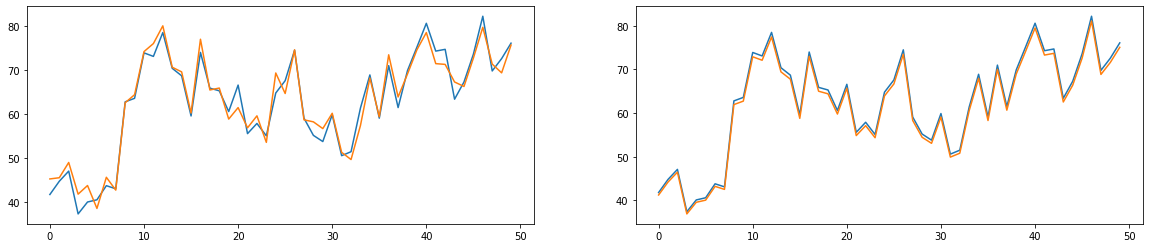

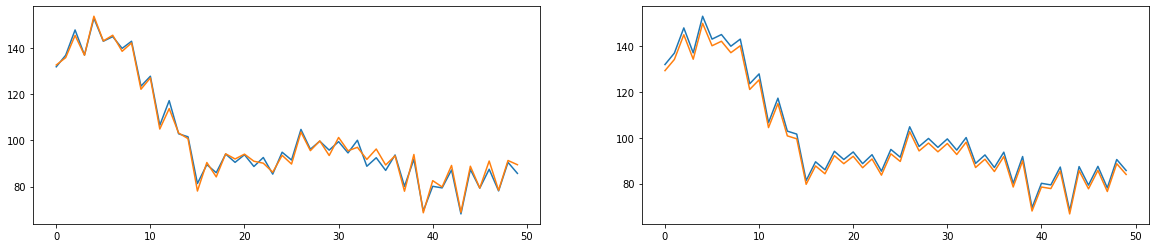

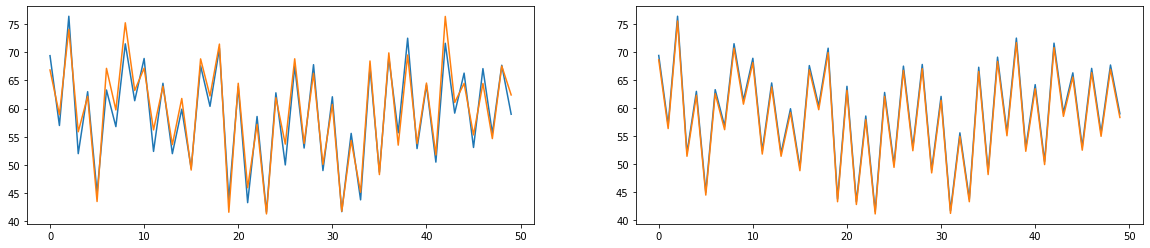

In [ ]:
# Visualize jittering and scaling

for i in [0, 1, 2]:
  data = train_x[i,:,0]
  size = len(data)

  n = np.random.normal(scale=2, size=size)
  jittered = data + n

  s = np.random.normal(loc=1, scale=0.015)
  scaled = data * s

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
  ax1.plot(data)
  ax1.plot(jittered)
  ax2.plot(data)
  ax2.plot(scaled)
  plt.show()

In [ ]:
# Create new dataset with basic data augmentation

def jitter(dataset, n_jitter):
  js = np.random.choice(len(dataset), size=n_jitter)

  jittered_arr = np.empty((n_jitter, length, dim))
  jitter_original_arr = np.empty((n_jitter, length, dim))

  for i in range(len(js)):
    ji = js[i]
    data = dataset[ji]

    size = len(data)

    j = np.random.normal(scale=2, size=(length, dim))
    jittered = data + j

    jittered_arr[i] = jittered
    jitter_original_arr[i] = data

  return jittered_arr, jitter_original_arr

def scale(dataset, n_scale):
  ss = np.random.choice(len(dataset), size=n_scale)

  scaled_arr = np.empty((n_scale, length, dim))
  scale_original_arr = np.empty((n_scale, length, dim))

  for i in range(len(ss)):
    si = ss[i]
    data = dataset[si]

    size = len(data)

    s = np.random.normal(loc=1, scale=0.015, size=(1, dim))
    scaled = data * s

    scaled_arr[i] = scaled
    scale_original_arr[i] = data

  return scaled_arr, scale_original_arr


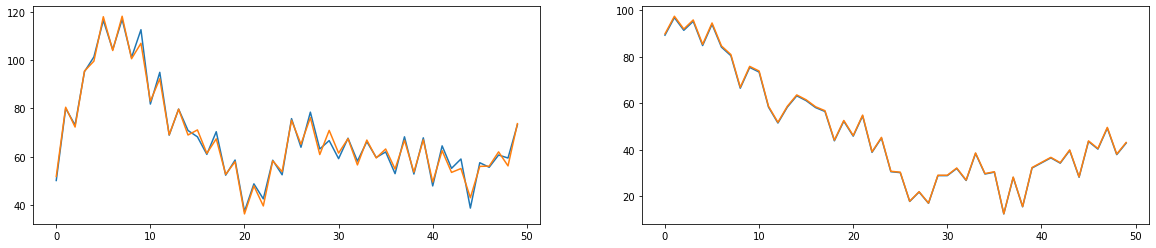

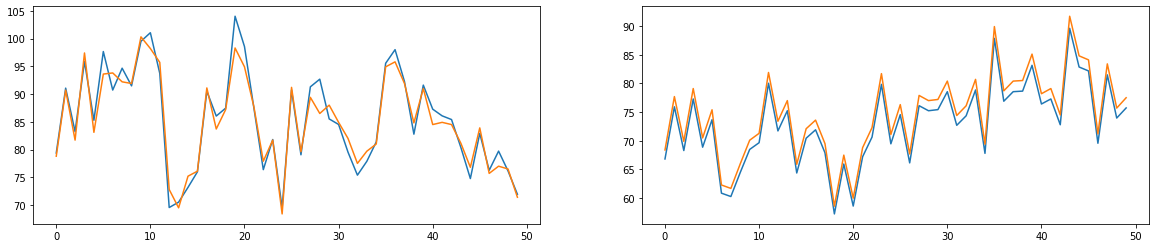

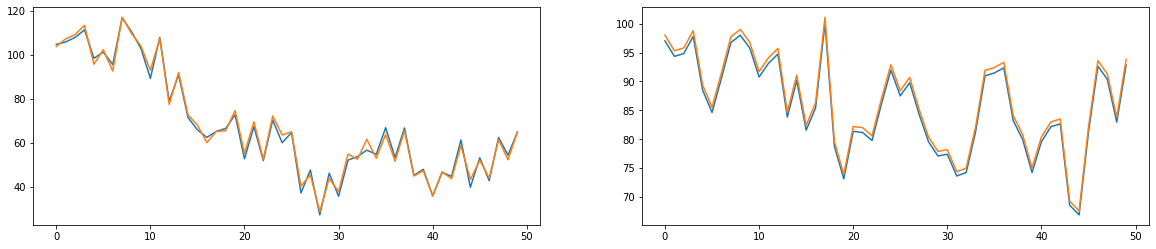

In [ ]:
n_jitter = 5
n_scale = 5

jittered_arr, jitter_original_arr = jitter(train_x, n_jitter)
scaled_arr, scale_original_arr = scale(train_x, n_scale)

for i in [0, 1, 2]:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
  ax1.plot(jittered_arr[i,:,0])
  ax1.plot(jitter_original_arr[i,:,0])
  ax2.plot(scaled_arr[i,:,0])
  ax2.plot(scale_original_arr[i,:,0])
  plt.show()

## GAN data augmentation

## Basic RNN

## Attention-based RNN

## 결과 종합